# Probability

## Reto 1
Hay una caja con 10 bolas blancas, 12 bolas rojas y 8 bolas negras. Calcula la probabilidad de:
* Sacar una bola blanca.
* Sacar una bola blanca en la primera extracción y una bola negra en la segunda extracción sin reemplazar la primera.
* Sacar una bola blanca en la primera extracción y una bola negra en la segunda extracción reemplazando la primera.
* Sacar 3 bolas y que sean todas de diferentes colores.

In [8]:
def probability_white_ball(total_balls, white_balls):
    return white_balls / total_balls

def probability_white_then_black_no_replacement(total_balls, white_balls, black_balls):
    prob_white_first = white_balls / total_balls
    prob_black_second = black_balls / (total_balls - 1)
    return prob_white_first * prob_black_second

def probability_white_then_black_with_replacement(total_balls, white_balls, black_balls):
    prob_white_first = white_balls / total_balls
    prob_black_second = black_balls / total_balls
    return prob_white_first * prob_black_second

def probability_three_different_colors(total_balls, white_balls, red_balls, black_balls):
    prob_white_first = white_balls / total_balls
    prob_red_second = red_balls / (total_balls - 1)
    prob_black_third = black_balls / (total_balls - 2)
    prob_different_colors = prob_white_first * prob_red_second * prob_black_third
    permutations = 6  # 3!
    return permutations * prob_different_colors

# Total balls
total_balls = 10 + 12 + 8

print(f"Probability of drawing a white ball: {probability_white_ball(total_balls, 10)}")
print(f"Probability of drawing a white ball first and then a black ball without replacement: {probability_white_then_black_no_replacement(total_balls, 10, 8)}")
print(f"Probability of drawing a white ball first and then a black ball with replacement: {probability_white_then_black_with_replacement(total_balls, 10, 8)}")
print(f"Probability of drawing 3 balls of different colors: {probability_three_different_colors(total_balls, 10, 12, 8)}")


Probability of drawing a white ball: 0.3333333333333333
Probability of drawing a white ball first and then a black ball without replacement: 0.09195402298850575
Probability of drawing a white ball first and then a black ball with replacement: 0.08888888888888888
Probability of drawing 3 balls of different colors: 0.23645320197044334


## Reto 2

Quieres ir de picnic el sábado. Odias la lluvia y quieres planificar tu fin de semana. Para ayudarte a tomar una decisión, recopilas los siguientes datos sobre los días lluviosos:

* El 40% de todos los días están nublados.
* Aproximadamente el 50% de los días nublados son lluviosos.
* Aproximadamente el 20% de los días no nublados son lluviosos.

¿Cuál es la probabilidad de que llueva el próximo sábado?

In [9]:
def probability_rain(P_cloudy, P_rain_cloudy, P_rain_not_cloudy):
    P_not_cloudy = 1 - P_cloudy
    return P_rain_cloudy * P_cloudy + P_rain_not_cloudy * P_not_cloudy

P_cloudy = 0.4
P_rain_cloudy = 0.5
P_rain_not_cloudy = 0.2

print(f"Probability of rain next Saturday: {probability_rain(P_cloudy, P_rain_cloudy, P_rain_not_cloudy)}")


Probability of rain next Saturday: 0.32


## Reto 3

A y B son eventos de una probabilidad tal que \(P(A) = 0.3\), \(P(B) = 0.6\) y \(P(A \cap B) = 0.1\)

¿Cuáles de las siguientes afirmaciones son verdaderas?
**SUGERENCIA: dibuja un gran diagrama de Venn a tu lado**
* \(P(\overline{A}) = 0.7\)
* \(P(A \cup B) = 0.6\)
* \(P(A \cap \overline{B}) = 0.2\)
* \(P(A \cup \overline{A}) = 1\)  
* \(P(A \cap (B \cup \overline{B})) = 0.4\)
* \(P(\overline{A} \cap \overline{B}) = 0.3\)
* \(P(\overline{A \cap B}) = 0.9\)

In [10]:
def verify_statements(P_A, P_B, P_A_and_B):
    P_not_A = 1 - P_A
    P_A_or_B = P_A + P_B - P_A_and_B
    P_A_and_not_B = P_A - P_A_and_B
    P_A_or_not_A = 1
    P_A_and_B_or_not_B = P_A
    P_not_A_and_not_B = 1 - P_A_or_B
    P_not_A_and_B = 1 - P_A_and_B
    
    return {
        "P(¬A)": P_not_A,
        "P(A ∪ B)": P_A_or_B,
        "P(A ∩ ¬B)": P_A_and_not_B,
        "P(A ∪ ¬A)": P_A_or_not_A,
        "P(A ∩ (B ∪ ¬B))": P_A_and_B_or_not_B,
        "P(¬A ∩ ¬B)": P_not_A_and_not_B,
        "P(¬(A ∩ B))": P_not_A_and_B
    }

P_A = 0.3
P_B = 0.6
P_A_and_B = 0.1

results = verify_statements(P_A, P_B, P_A_and_B)
for statement, result in results.items():
    print(f"{statement} = {result}")

P(¬A) = 0.7
P(A ∪ B) = 0.7999999999999999
P(A ∩ ¬B) = 0.19999999999999998
P(A ∪ ¬A) = 1
P(A ∩ (B ∪ ¬B)) = 0.3
P(¬A ∩ ¬B) = 0.20000000000000007
P(¬(A ∩ B)) = 0.9


## Reto 4

* Si alguien viaja a China, la probabilidad de contraer Covid es del 1%
* Si alguien viaja a Italia, la probabilidad de contraer Covid es del 20%

Lanzo un dado con números 1, 2, 3, 4, 5, 6:
* Si sale 1: Vuelo a Italia
* Si no sale 1: Vuelo a China

Durante mi viaje, contraje Covid. ¿Cuál es la probabilidad de que haya volado a China?

In [11]:
def probability_china_given_covid(P_Covid_China, P_China, P_Covid_Italy, P_Italy):
    P_Covid = (P_Covid_China * P_China) + (P_Covid_Italy * P_Italy)
    return (P_Covid_China * P_China) / P_Covid

P_Covid_China = 0.01
P_China = 5/6
P_Covid_Italy = 0.2
P_Italy = 1/6

print(f"Probability of having flown to China given that I contracted Covid: {probability_china_given_covid(P_Covid_China, P_China, P_Covid_Italy, P_Italy)}")

Probability of having flown to China given that I contracted Covid: 0.2


## BONUS

Lanzas 2 dados. ¿Cuál es la probabilidad de que la suma de los números sea 7? ¿Y 8? ¿Y 9? Luego simula 10000 veces y dibuja un gráfico de conteo.

tu explicación aquí

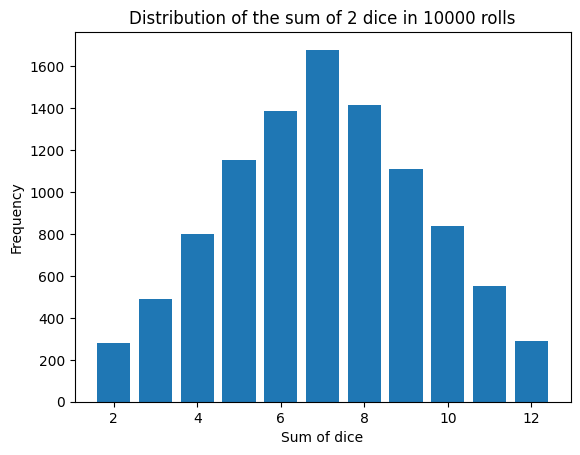

Probability of the sum being 7: 0.16666666666666666
Probability of the sum being 8: 0.1388888888888889
Probability of the sum being 9: 0.1111111111111111


In [6]:
# YOUR CODE HERE
import numpy as np
import matplotlib.pyplot as plt

# Simulation
n_simulations = 10000
dice = np.random.randint(1, 7, size=(n_simulations, 2))
sum_dice = dice.sum(axis=1)

# Count
sum_count = np.bincount(sum_dice)[2:]

# Plot
plt.bar(range(2, 13), sum_count)
plt.xlabel('Sum of dice')
plt.ylabel('Frequency')
plt.title('Distribution of the sum of 2 dice in 10000 rolls')
plt.show()

# Exact probabilities for sums of 7, 8, and 9
prob_sum_7 = 6 / 36
prob_sum_8 = 5 / 36
prob_sum_9 = 4 / 36
print(f"Probability of the sum being 7: {prob_sum_7}")
print(f"Probability of the sum being 8: {prob_sum_8}")
print(f"Probability of the sum being 9: {prob_sum_9}")